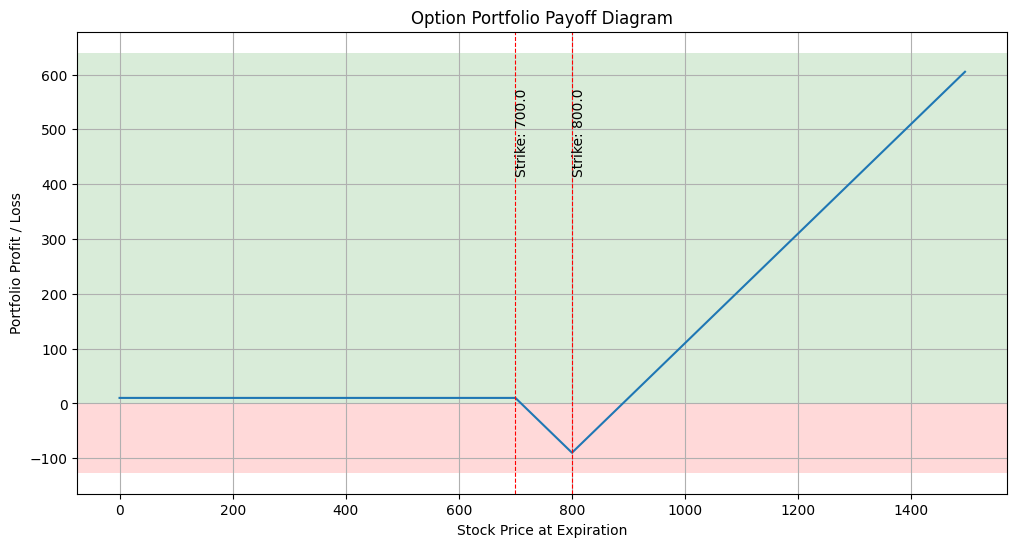

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

def calculate_option_payoff(option_type, stock_price, strike_price, position, premium):
    """Calculates the payoff of an option.

    Args:
        option_type (str): 'c' for call, 'p' for put.
        stock_price (float or np.ndarray): Stock price(s) at expiration.
        strike_price (float): Strike price of the option.
        position (str): 'l' for long, 's' for short.
        premium (float): Premium of the option.

    Returns:
        float or np.ndarray: Payoff of the option.
    """
    if option_type == 'c':
        intrinsic_value = np.maximum(0, stock_price - strike_price)
    elif option_type == 'p':
        intrinsic_value = np.maximum(0, strike_price - stock_price)
    else:
        raise ValueError("Invalid option type. Use 'c' for call or 'p' for put.")

    if position == 'l':  # Long position
        payoff = intrinsic_value - premium
    elif position == 's':  # Short position
        payoff = -intrinsic_value + premium
    else:
        raise ValueError("Invalid position type. Use 'l' for long or 's' for short.")

    return payoff


def calculate_portfolio_payoff(positions, stock_prices):
    """Calculates the total payoff of the portfolio.

    Args:
        positions (list): List of option positions (tuples).
        stock_prices (np.ndarray): Array of stock prices.

    Returns:
        np.ndarray: Total portfolio payoff.
    """

    total_payoff = np.zeros_like(stock_prices, dtype=float)
    for pos_str, opt_qty in positions:  #Change variable name for clarity
        match = re.match(r"([ls])([cp])(\d+)_(\d+\.?\d*)", pos_str)
        if not match:
            raise ValueError(f"Invalid position format: {pos_str}")

        position, opt_type, strike, premium = match.groups() #Change variable name for clarity
        strike = float(strike)
        strikes.append(strike)  # Store strike prices for plotting
        premium = float(premium)
        #position = int(position_qty) #Remove this line

        payoff = calculate_option_payoff(opt_type, stock_prices, strike, position, premium)
        total_payoff += payoff * float(opt_qty) # Multiply payoff with quantity
    return total_payoff


def get_option_input():
    """Gets option input from the user."""

    positions = []
    while True:
        pos_str = input("Enter option position (e.g., 'lc60_2.50' or 'sc70_1.00') or leave empty to finish: ")
        if not pos_str:
            break
        opt_qty = input(f"Enter the quantity for {pos_str}: ") #Change variable name for clarity
        positions.append((pos_str, opt_qty))
    return positions


# --- Main Program ---

if __name__ == "__main__":
    positions = get_option_input()

    strikes = []

    stock_prices = np.arange(0, 1500, 5)  # Adjust range as needed
    portfolio_payoffs = calculate_portfolio_payoff(positions, stock_prices)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(stock_prices, portfolio_payoffs)
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Portfolio Profit / Loss")
    plt.title("Option Portfolio Payoff Diagram")
    plt.grid(True)
    
    # Add strike price lines
    for strike in strikes:
        plt.axvline(x=strike, color='red', linestyle='--', linewidth=0.8)
        plt.text(strike, plt.ylim()[1] * 0.9, f'Strike: {strike}', rotation=90, verticalalignment='top')

    plt.show()